In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_json('logins.json')
df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.describe()

login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [5]:

# df.sort_values('login_time')
# df

In [6]:
df.set_index('login_time',inplace=True)
df['count'] = 1
df_15 = df.resample('15T').sum()
df_15.head()


count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1

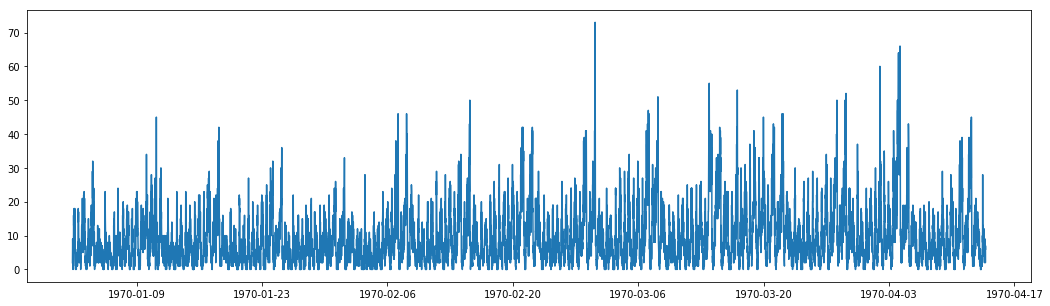

In [7]:
plt.figure(figsize=(18,5))
plt.plot(df_15)

Text(0.5,1,'Daily Logins')

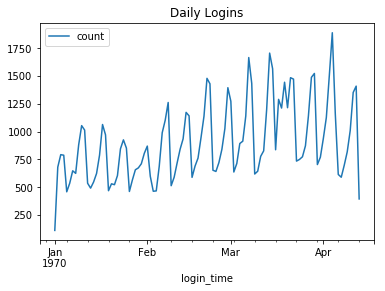

In [8]:
df_day = df.resample('D').sum()
df_day.plot()
plt.title('Daily Logins')

Text(0.5,1,'Weekly logins')

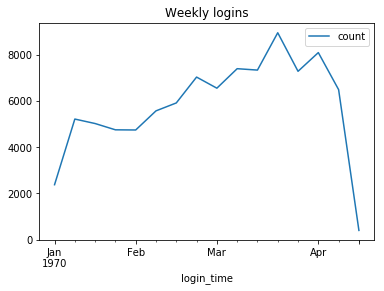

In [9]:
df_week = df.resample('W').sum()
df_week.plot()
plt.title("Weekly logins")

In [10]:
df_month = df.resample('M').sum()
df_month.plot()
plt.title('Monthly Logins')

Text(0.5,1,'Monthly Logins')

# Part 2

### Question 1: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

### Answer:

I would measure the number of driver partners driving through the toll bridge during the day and at night, because the number of tolls being reimbursed shows how effective the reimbursement policy is in encouraging drivers to move freely between the two cities.

### Question 2: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
### a. how you will implement the experiment
### b. what statistical test(s) you will conduct to verify the significance of the observation
### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Answer:
a. The most direct experiment is to create an A/B test that would test the activity of drivers before and after the toll reimbursement policy is implemented. Their will be two random sample groups of drivers, one will be the control group and the other will be the treament group. The control group will not have the toll reimbursement policy, while the treatment group will have the policy. Then both groups will be measured to see whether the new policy is indeed effective.

b. The statistical test that I will use is the t-test to verify for significance.

c. If the number of drivers in each city doesnt increase by a significant amount from the control group to the treament group, then more testing is needed to see why this is the case, and if different policies should be used instead. However, if the number of drivers in each city increases but profits do not show significant increases, then adjustments to the policy should be considered that would both increase driver mobility and profits.

# Part 3

Data description:
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

# Exploratory Data Analysis

In [11]:
import json
f = open('ultimate_data_challenge.json','r')
df_u = pd.DataFrame(json.load(f))
df_u

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          3.67                   5.0                   4.7       1.10   
1          8.26                   5.0                   5.0       1.00   
2          0.77                   5.0                   4.3       1.00   
3          2.36                   4.9                   4.6       1.14   
4          3.13                   4.9                   4.4       1.19   
5         10.56                   5.0                   3.5       1.00   
6          3.95                   4.0                   NaN       1.00   
7          2.04                   5.0                   5.0       1.00   
8          4.36                   5.0                   4.5       1.00   
9          2.37                   5.0                   NaN       1.00   
10         4.28                   4.9                   5.0       1.00   
11         3.81                   5.0                   4.0       1.00   
12        20.29                   5.0                   NaN       1.00   
13         3.04                   5.0                   4.0       1.38   
14        26.01                   5.0                   NaN       1.00   
15        13.20                   5.0                   NaN       1.00   
16        10.86                   3.0                   5.0       1.00   
17         2.38                   4.8                   3.9       1.00   
18         6.83                   4.8                   4.6       1.21   
19        12.08                   5.0                   5.0       1.17   
20         2.53                   3.0                   NaN       1.00   
21         3.31                   5.0                   NaN       1.00   
22        11.47                   5.0                   NaN       1.00   
23         7.74                   5.0                   5.0       1.00   
24         2.10                   4.7                   4.5       1.02   
25        14.48                   5.0                   NaN       1.00   
26         1.66                   5.0                   4.0       1.00   
27         3.05                   5.0                   5.0       1.05   
28         5.97                   5.0                   NaN       1.50   
29        11.25                   5.0                   4.0       1.00   
...         ...                   ...                   ...        ...   
49970      5.62                   5.0                   4.3       1.00   
49971      4.69                   5.0                   NaN       1.00   
49972      4.60                   3.5                   4.0       1.25   
49973      4.07                   5.0                   4.0       1.00   
49974      4.63                   5.0                   5.0       2.00   
49975      2.18                   4.8                   3.9       1.03   
49976      2.39                   4.0                   2.0       1.00   
49977      8.71                   5.0                   5.0       1.00   
49978      6.02                   5.0                   4.5       1.00   
49979      3.81                   4.8                   4.0       1.00   
49980     14.42                   5.0                   NaN       1.00   
49981      5.49                   5.0                   4.0       1.00   
49982     15.23                   5.0                   5.0       1.00   
49983     30.39                   5.0                   1.0       1.00   
49984      3.50                   5.0                   NaN       1.00   
49985      1.38                   5.0                   NaN       1.00   
49986      0.52                   5.0                   4.0       1.00   
49987      4.24                   4.0                   4.6       1.00   
49988      2.53                   5.0                   4.5       1.00   
49989      0.00                   5.0                   NaN       1.00   
49990      3.38                   5.0                   4.7       1.08   
49991      1.06                   5.0                   5.0       1.25   
49992      

In [12]:
df_u.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074764   
std        5.707357              0.446652              0.617338      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000                0.000000      0.000000  
25%        0.000000                0.000000     33.300000  
50%        0.000000                1.000000     66.700000  
75%        8.600000                3.000000    100.000000  
max      100.000000              125.000000    100.000000

In [13]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
df_u['last_trip_date'] = pd.to_datetime(df_u.last_trip_date)
df_u['signup_date'] = pd.to_datetime(df_u.signup_date)
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
df_u['avg_rating_by_driver'] = df_u.avg_rating_by_driver.fillna(df_u.avg_rating_by_driver.mean())
df_u['avg_rating_of_driver'] = df_u.avg_rating_of_driver.fillna(df_u.avg_rating_of_driver.mean())

Filled missing values in avg_rating columns with the average rating in respective columns.

In [16]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
df_u.avg_rating_by_driver.fillna(5)
df_u.avg_rating_by_driver.unique()

array([5.       , 4.9      , 4.       , 3.       , 4.8      , 4.7      ,
       4.5      , 4.2      , 4.7781582, 4.4      , 4.6      , 3.7      ,
       4.3      , 3.5      , 2.       , 3.8      , 2.5      , 4.1      ,
       3.9      , 1.       , 3.3      , 3.4      , 3.6      , 3.2      ,
       2.3      , 2.8      , 1.5      , 2.7      ])

In [18]:
min(df_u.last_trip_date)

Timestamp('2014-01-01 00:00:00')

In [19]:
max(df_u.last_trip_date)

Timestamp('2014-07-01 00:00:00')

In [20]:
min(df_u.signup_date)

Timestamp('2014-01-01 00:00:00')

In [21]:
max(df_u.signup_date)

Timestamp('2014-01-31 00:00:00')

Assumed that the current date is the maximum date in the dataset which is July 1st, 2014

In [22]:
df_u['active'] = np.nan
df_u.loc[df_u['last_trip_date'] >= "2014-06-01", "active"] = 1
df_u.loc[df_u['last_trip_date'] < "2014-06-01", "active"] = 0

In [23]:
df_u.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  active  
0                       4                 True         46.2     1.0  
1                       0                False         50.0     0.0  
2                       3                False        100.0     0.0  
3                       9                 True         80.0     1.0  
4                      14                False         82.4     0.0

In [24]:
df_u[['avg_rating_by_driver','avg_rating_of_driver','active']].describe()

avg_rating_by_driver  avg_rating_of_driver        active
count          50000.000000          50000.000000  50000.000000
mean               4.778158              4.601559      0.376080
std                0.445753              0.564977      0.484405
min                1.000000              1.000000      0.000000
25%                4.700000              4.500000      0.000000
50%                5.000000              4.700000      0.000000
75%                5.000000              5.000000      1.000000
max                5.000000              5.000000      1.000000

In [25]:
df_u.active.value_counts()

0.0    31196
1.0    18804
Name: active, dtype: int64

In [26]:
active_perc = df_u.active.sum() / len(df_u.active)
active_perc

0.37608

Only 37.6 percent of drivers were active during the last 6 months

In [27]:
df_u.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [28]:
df_active = df_u.groupby('active')
df_active.mean()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
active                                                                    
0.0     6.207939              4.787415              4.606309   1.075339   
1.0     5.114788              4.762801              4.593679   1.073809   

        surge_pct  trips_in_first_30_days  ultimate_black_user  weekday_pct  
active                                                                       
0.0      8.666739                1.658482             0.299942    60.647032  
1.0      9.152797                3.306318             0.505052    61.389034

The number of active users that are ultimate black users are almost double of inactive users that are also ultimate black users. Meanwhile, the average ratings both by and of the driver doesnt seem to change between active and inactive users.

In [29]:
df_new = pd.get_dummies(df_u,columns=['city','ultimate_black_user','phone'],drop_first=True)
df_new.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

  last_trip_date signup_date  surge_pct  trips_in_first_30_days  weekday_pct  \
0     2014-06-17  2014-01-25       15.4                       4         46.2   
1     2014-05-05  2014-01-29        0.0                       0         50.0   
2     2014-01-07  2014-01-06        0.0                       3        100.0   
3     2014-06-29  2014-01-10       20.0                       9         80.0   
4     2014-03-15  2014-01-27       11.8                      14         82.4   

   active  city_King's Landing  city_Winterfell  ultimate_black_user_True  \
0     1.0                    1                0                         1   
1     0.0                    0                0                         0   
2     0.0                    0                0                         0   
3     1.0                    1                0                         1   
4     0.0                    0                1                         0   

   phone_iPhone  
0             1  
1             0  
2             1  
3             1  
4             0

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                    50000 non-null float64
avg_rating_by_driver        50000 non-null float64
avg_rating_of_driver        50000 non-null float64
avg_surge                   50000 non-null float64
last_trip_date              50000 non-null datetime64[ns]
signup_date                 50000 non-null datetime64[ns]
surge_pct                   50000 non-null float64
trips_in_first_30_days      50000 non-null int64
weekday_pct                 50000 non-null float64
active                      50000 non-null float64
city_King's Landing         50000 non-null uint8
city_Winterfell             50000 non-null uint8
ultimate_black_user_True    50000 non-null uint8
phone_iPhone                50000 non-null uint8
dtypes: datetime64[ns](2), float64(7), int64(1), uint8(4)
memory usage: 4.0 MB


In [31]:
df_new.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

  last_trip_date signup_date  surge_pct  trips_in_first_30_days  weekday_pct  \
0     2014-06-17  2014-01-25       15.4                       4         46.2   
1     2014-05-05  2014-01-29        0.0                       0         50.0   
2     2014-01-07  2014-01-06        0.0                       3        100.0   
3     2014-06-29  2014-01-10       20.0                       9         80.0   
4     2014-03-15  2014-01-27       11.8                      14         82.4   

   active  city_King's Landing  city_Winterfell  ultimate_black_user_True  \
0     1.0                    1                0                         1   
1     0.0                    0                0                         0   
2     0.0                    0                0                         0   
3     1.0                    1                0                         1   
4     0.0                    0                1                         0   

   phone_iPhone  
0             1  
1             0  
2             1  
3             1  
4             0

# Predictive Modeling

Random Forest Trees model is used instead of other models because it is fast, and it is already known what parameters want to be looked at when building the model.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(max_depth = 5,class_weight="balanced")

X = df_new.drop(['active','last_trip_date','signup_date'],axis=1)
y = df_new.active

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [39]:
rfc.fit(X_train,y_train)

importances = rfc.feature_importances_
feat_names = df_new.drop(['active'],axis=1).columns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [40]:
from sklearn.model_selection import permutation_test_score

score, permutation_scores, pvalue = permutation_test_score(rfc, X_test.values, 
                                                           y_test.values, scoring="accuracy", cv = 5, n_permutations = 100, n_jobs=1)
print(score)
print(permutation_scores)

0.7592967253741814
[0.50109925 0.4977025  0.4905019  0.49670025 0.4919008  0.4943976
 0.4989998  0.4913995  0.51599745 0.49599935 0.51429535 0.5038994
 0.515798   0.51740225 0.51429895 0.49060225 0.4943026  0.5015995
 0.500899   0.5128013  0.5177944  0.5087048  0.51650105 0.5024015
 0.5052968  0.50140125 0.4939012  0.4911997  0.50549765 0.4978946
 0.51220145 0.50740055 0.5131027  0.502897   0.4946006  0.50269615
 0.4994     0.5327012  0.49520215 0.49779395 0.4935997  0.5079016
 0.4854931  0.511396   0.51209765 0.4904958  0.52110215 0.50719845
 0.50380145 0.48819865 0.51039945 0.5091956  0.5145002  0.48669645
 0.50100045 0.5105022  0.49290115 0.4986983  0.5063     0.50580235
 0.49300225 0.50960795 0.4955991  0.5312994  0.50230065 0.4938033
 0.510699   0.53039825 0.5244006  0.50329655 0.5018973  0.5162037
 0.49930145 0.52430235 0.51149865 0.50259745 0.5215998  0.4919948
 0.49660005 0.5440945  0.50840305 0.5138976  0.51399815 0.53210215
 0.5067989  0.530403   0.5191995  0.50949815 0.50449

In [41]:
print(pvalue)

0.009900990099009901


In [59]:
from sklearn.model_selection import GridSearchCV

params = [{'n_estimators':[100,500,1000],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']
          }]
new_model = GridSearchCV(rfc,param_grid=params,cv=5)

new_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print(new_model.best_score_)
print(new_model.best_params_)

0.77475
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 1000}


In [66]:
print(new_model.best_estimator_)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


# Conclusion

The test has a p-value less than 0.01 which means that that the test is statistically significant, with an accuracy score of 77  percent. The model could be used to predict how active new users will be in the future, and can also be useful in determining new policies to keep number of active users consistent or to increase number of active users. It seems that the higher the rating of a driver, the more likely he will remain active. Maybe the best thing to do to promote new drivers is give them leniency on their ratings for a given amount of time for them to get used to becoming a driver and gain a good rating. Afterwards, the ratings they get will only be affected by user reviews. This method could alleviate high new driver turnover rates, which would directly increase supply of drivers and therefore more potential profit.